# Data Modelling - Octane Data
## Solution by Harshal Erande

The Octane data found in the attached spreadsheet (Octane.csv) show how three different materials in the feed stock and a composite variable describing processing conditions affect the octane rating of refined gasoline. Since higher octane is valuable to a refinery, we wish to build a multiple regression model to predict resulting octane depending on feed stock composition and processing conditions.
### 1. Generate an OLS model with all main effects included. Perform standard regression diagnostics on this model. What can you conclude?


In [81]:
# import all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy.stats as stats
%matplotlib inline

# read the csv file
octane_df=pd.read_csv("Octane.csv")

#sample no. is not a required feature so we put that in index
octane_df=octane_df.set_index('Sample')

# check how the data looks
print(octane_df.shape)
# head of table
print(octane_df.head())
# summary of data
print(octane_df.describe())

# check for null values
octane_df.isnull().any()


(82, 5)
        Material1  Material2  Material3  Condition  Octane
Sample                                                    
1           55.33       1.72         54    1.66219   92.19
2           59.13       1.20         53    1.58399   92.74
3           57.39       1.42         55    1.61731   91.88
4           56.43       1.78         55    1.66228   92.80
5           55.98       1.58         54    1.63195   92.56
       Material1  Material2  Material3  Condition     Octane
count   82.00000  82.000000  82.000000  82.000000  82.000000
mean    60.17061   1.663659  55.463415   1.626571  91.849878
std     12.43740   1.901952   5.377583   0.219730   1.401124
min      4.23000   0.000000  40.000000   1.199750  89.660000
25%     55.38000   0.105000  54.000000   1.518095  90.847500
50%     62.69500   1.280000  56.000000   1.603575  91.735000
75%     67.78000   2.277500  59.750000   1.722818  92.467500
max     75.54000  10.760000  64.000000   2.319090  97.610000


Material1    False
Material2    False
Material3    False
Condition    False
Octane       False
dtype: bool

File is read successfully into a dataframe.  
There are no null values.

Let us check for linearity of variables by plotting scatter plot between variables and octane values

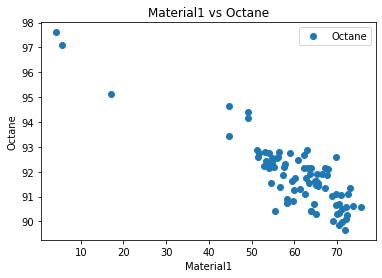

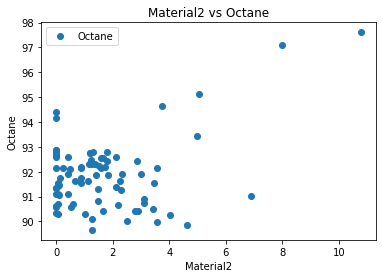

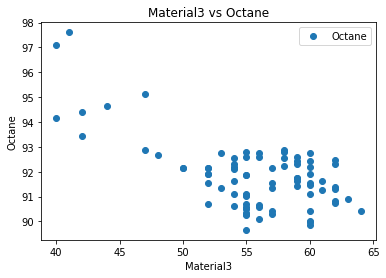

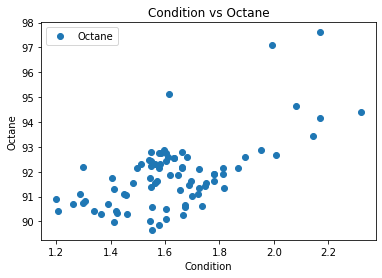

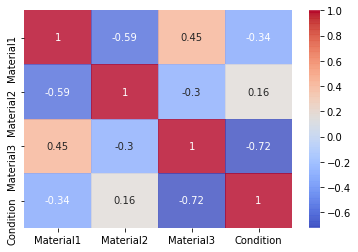

In [82]:
octane_df.plot(x='Material1', y='Octane', style='o')  
plt.title('Material1 vs Octane')  
plt.ylabel('Octane')  
plt.xlabel('Material1')  
plt.show()

octane_df.plot(x='Material2', y='Octane', style='o')  
plt.title('Material2 vs Octane')  
plt.ylabel('Octane')  
plt.xlabel('Material2')   
plt.show()

octane_df.plot(x='Material3', y='Octane', style='o')  
plt.title('Material3 vs Octane')  
plt.ylabel('Octane')  
plt.xlabel('Material3')  
plt.show()

octane_df.plot(x='Condition', y='Octane', style='o')  
plt.title('Condition vs Octane')  
plt.ylabel('Octane')  
plt.xlabel('Condition')  
plt.show()

# multicollinearity check
corr = octane_df.iloc[:,0:4].corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,cmap="coolwarm", alpha=0.8,annot=True)

There is linear relationship between independent and dependent variables.  
And there appears to be absolute correlation between Material3 and Condition >0.7 
So there may be some redundancy.

We can start linear regression modelling by first splitting the data into train and test.

In [83]:
train, test = train_test_split(octane_df, test_size=0.2,random_state=0)
X_train = train.iloc[:,0:4] # first 3 columns are independent variables
y_train = train.iloc[:,-1] # last column is dependent varaible

# apply same to test set
X_test = test.iloc[:,0:4]
y_test = test.iloc[:,-1]

X_train.head()

,Material1,Material2,Material3,Condition
Sample,,,,
75,4.23,10.76,41,2.17070
49,67.19,0.00,52,1.86782
39,67.84,0.49,54,1.72387
7,54.85,1.17,54,1.58206
4,56.43,1.78,55,1.66228


Apply linear regression model in scikit learn

In [84]:
reg = LinearRegression()  
reg.fit(X_train, y_train) #training the algorithm

#To retrieve the intercept:
print(reg.intercept_)
#For retrieving the coefficients:
print(reg.coef_)

#For retrieving the coefficients in a dataframe
coeff_df = pd.DataFrame(reg.coef_, octane_df.iloc[:,0:4].columns, columns=['Coefficient'])  
print(coeff_df)

96.27422785026842
[-0.09611075 -0.12662647 -0.02699423  1.90526283]
           Coefficient
Material1    -0.096111
Material2    -0.126626
Material3    -0.026994
Condition     1.905263


We can mow check the accuracy of the model by computing the predicted values using test set and comparing it with actual values in test set

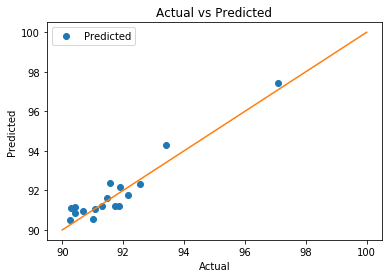

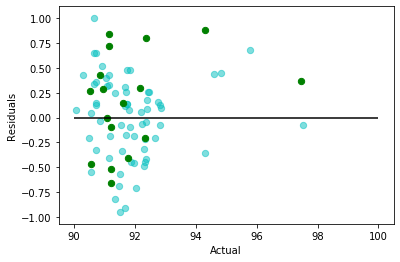

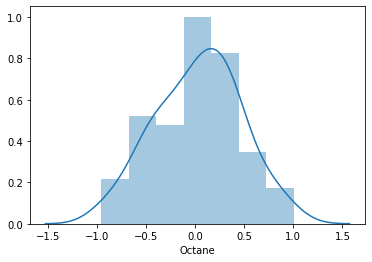

In [85]:
# predict y values using the model
y_pred = reg.predict(X_test)
residuals_test = reg.predict(X_test)-y_test
residuals_train = reg.predict(X_train)-y_train
residuals=pd.concat([residuals_test,residuals_train])

# Actual vs predicted scatter plot with reference 1 slope line
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df
df.plot(x='Actual', y='Predicted', style='o')  
plt.title('Actual vs Predicted')  
plt.xlabel('Actual')  
plt.ylabel('Predicted')  
plt.plot( [90,100],[90,100] )
plt.show()

# scatter plot with residuals and a reference line passing through zero residual error
plt.scatter(reg.predict(X_train),reg.predict(X_train)-y_train,c='c',s=40,alpha=0.5)
plt.scatter(reg.predict(X_test),reg.predict(X_test)-y_test,c='g',s=40)
plt.hlines(y=0,xmin=90,xmax=100)
plt.xlabel('Actual')  
plt.ylabel('Residuals') 
plt.show()

# visualize normal distribution of residuals
sns.distplot(residuals)

In [86]:
# calculating the accuracy metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared test:', metrics.r2_score(y_test, y_pred))

print('Root Mean Squared Error train:', np.sqrt(metrics.mean_squared_error(y_train, reg.predict(X_train))))
print('R Squared train:', metrics.r2_score(y_train, reg.predict(X_train)))

Mean Absolute Error: 0.4355744480702062
Mean Squared Error: 0.25699821227022623
Root Mean Squared Error test: 0.506949911007218
R Squared test: 0.8969403057107406
Root Mean Squared Error train: 0.40881534712587425
R Squared train: 0.906540864451247


We can see that the value of root mean squared error for test set is 0.51, which is very less than 1% of mean octane value which is 91.84  
train set RMSE is 0.41. So not a big difference in test vs train accuracy  
The R squared value is 0.897.  

This means that our algorithm is accurate and can make reasonably good predictions.


### 2. Next, generate a subset model with the least significant main effect excluded. Compare these two models using all the model comparison techniques applicable. What can you conclude?

In [87]:
# using statmodel api to calculate the p-values

import statsmodels.api as sm
X=octane_df.iloc[:,[0,1,2,3]] #independent variables
y=octane_df.iloc[:,-1] #dependant variable
X= sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Octane   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     184.7
Date:                Sun, 10 May 2020   Prob (F-statistic):           1.22e-38
Time:                        01:06:11   Log-Likelihood:                -46.725
No. Observations:                  82   AIC:                             103.4
Df Residuals:                      77   BIC:                             115.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.8532      1.225     78.255      0.0

From the OLS model using Statsmodel api and observing the p-values -
The Material3 model coefficient has a p-value of 0.073 which is more than p-value of 0.05 for statistical significance.

So this feature can be removed a generate a subset model.

In [88]:
train2, test2 = train_test_split(octane_df, test_size=0.2,random_state=0)
X_train2 = train2.iloc[:,[0,1,3]] #remove material3 from train
y_train2 = train2.iloc[:,-1]
X_test2 = test2.iloc[:,[0,1,3]] #remove material3 from test
y_test2 = test2.iloc[:,-1]
X_train2.head()

,Material1,Material2,Condition
Sample,,,
75,4.23,10.76,2.17070
49,67.19,0.00,1.86782
39,67.84,0.49,1.72387
7,54.85,1.17,1.58206
4,56.43,1.78,1.66228


In [89]:
reg2 = LinearRegression()  
reg2.fit(X_train2, y_train2) #training the algorithm

#To retrieve the intercept:
print(reg2.intercept_)
#For retrieving the coefficients:
print(reg2.coef_)

coeff_df2 = pd.DataFrame(reg2.coef_, octane_df.iloc[:,[0,1,3]].columns, columns=['Coefficient'])  
print(coeff_df2)

94.22624576667697
[-0.09779043 -0.12202472  2.3018431 ]
           Coefficient
Material1    -0.097790
Material2    -0.122025
Condition     2.301843


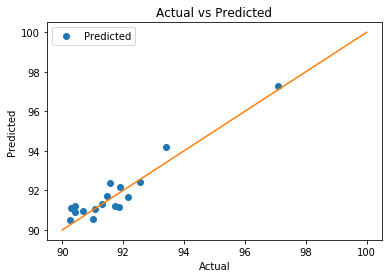

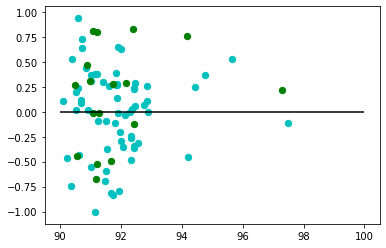

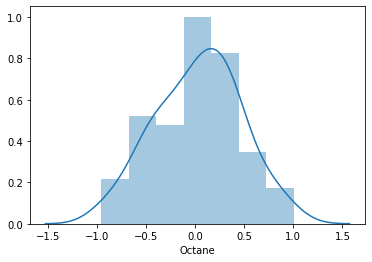

In [90]:
# predict y values using the model
y_pred2 = reg2.predict(X_test2)
residuals_test = reg.predict(X_test)-y_test
residuals_train = reg.predict(X_train)-y_train
residuals=pd.concat([residuals_test,residuals_train])

# Actual vs predicted scatter plot with reference 1 slope line
df2 = pd.DataFrame({'Actual': y_test2, 'Predicted': y_pred2})
df2.plot(x='Actual', y='Predicted', style='o')  
plt.title('Actual vs Predicted')  
plt.xlabel('Actual')  
plt.ylabel('Predicted')  
plt.plot( [90,100],[90,100] )
plt.show()

# scatter plot with residuals and a reference line passing through zero residual error
plt.scatter(reg2.predict(X_train2),reg2.predict(X_train2)-y_train2,c='c',s=40)
plt.scatter(reg2.predict(X_test2),reg2.predict(X_test2)-y_test2,c='g',s=40)
plt.hlines(y=0,xmin=90,xmax=100)
plt.show()

# visualize normal distribution of residuals
sns.distplot(residuals)

In [91]:
#calculate the accuracy metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test2, y_pred2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test2, y_pred2))  
print('Root Mean Squared Error test:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))
print('R Squared test:', metrics.r2_score(y_test2, y_pred2))


print('Root Mean Squared Error train:', np.sqrt(metrics.mean_squared_error(y_train2, reg2.predict(X_train2))))
print('R Squared train:', metrics.r2_score(y_train2, reg2.predict(X_train2)))

Mean Absolute Error: 0.42864602044174327
Mean Squared Error: 0.25391471478981115
Root Mean Squared Error test: 0.5038995086223156
R Squared test: 0.8981768291280285
Root Mean Squared Error train: 0.4209239432690823
R Squared train: 0.9009225915902364


The subset model not much improvement in accuracy over first model using all features.  
But we get same results with lesser features.  
If there is huge amount of data, then we can remove this feature for improvement in performance.  
Also, we conclude that Material3 does not contribute significantly to the Octane value. So Material3 need not be used to compute Octane ratings.  


### 3. If your goal was to produce gasoline at an octane rating of 95, pick one set of operating conditions that would do so. Make sure that this operating condition set is within the scope of the model (that is, within the ranges for each variable used to build the model).

Using our regression model developed using the subset.

The coefficients and intercept are as follows:
   

In [92]:
intercept = reg2.intercept_
print(intercept)
print(coeff_df2)

94.22624576667697
           Coefficient
Material1    -0.097790
Material2    -0.122025
Condition     2.301843


In [93]:
octane_df.describe()

,Material1,Material2,Material3,Condition,Octane
count,82.00000,82.000000,82.000000,82.000000,82.000000
mean,60.17061,1.663659,55.463415,1.626571,91.849878
std,12.43740,1.901952,5.377583,0.219730,1.401124
min,4.23000,0.000000,40.000000,1.199750,89.660000
25%,55.38000,0.105000,54.000000,1.518095,90.847500
50%,62.69500,1.280000,56.000000,1.603575,91.735000
75%,67.78000,2.277500,59.750000,1.722818,92.467500
max,75.54000,10.760000,64.000000,2.319090,97.610000


We can use values of material and condition using the min-max range given above  
Material1 = 4.23 to 75.54  
Material2 = 0 to 10.76  
Condition = 1.19975 to 2.319090  


In [94]:
Material1 = 5
Material2 = 5
Condition = 2.319090
octane = intercept + coeff_df2.iloc[0]*Material1 + coeff_df2.iloc[1]*Material2 + coeff_df2.iloc[2]*Condition
print(octane)

Coefficient    98.465351
dtype: float64


Above used values gives Octane value of 98.465 which is higher than required 95 value.
So we further try to adjust values within the range to get closer to 95

In [95]:
Material1 = 15
Material2 = 6
octane =95

condition = (octane - (intercept + coeff_df2.iloc[0]*Material1 + coeff_df2.iloc[1]*Material2))/coeff_df2.iloc[2]
print(condition)

Coefficient    1.291469
dtype: float64


The values of operating conditions to generate 95 Octane gasoline are :  
    Material1 = 15  
    Material2 = 6  
    Condition = 1.291469  
There are other set of values also possible, but this is one of the sets